In [6]:
import torch 
import matplotlib.pyplot as mpl
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim
from torch.autograd import Variable

Input_num = 100
Hidden_num = 20

class net(nn.Module):
    def __init__(self):
        super(net,self).__init__()
        self.l1 = nn.Linear(Input_num,Hidden_num)
        self.l2 = nn.Linear(Hidden_num,Input_num)
        
    def forward(self,data):
        x = self.l1(data)
        x = f.relu(x)
        x = self.l2(x)
        return x

然后定义一个tensor(张量)，以及将tensor(张量)转化成variable(变量)。之所以需要将tensor转化成variable是因为pytorch中tensor(张量)只能放在CPU上运算，而(variable)变量是可以只用GPU进行加速计算的。 所以说这就是为什么pytorch加载图像的时候一般都会使用(variable)变量.  下面一段代码演示的是tensor和variable(变量)之间的转化。

In [7]:
data = Variable(torch.randn(100))
label = Variable(data * 0.5 + 0.2)
print (data)
print (label)

tensor([-0.6786,  2.0173, -1.6577, -0.4963,  0.9068,  0.8448, -0.3502, -0.7405,
         0.0661, -0.6434,  0.5963,  0.1045, -0.3263, -0.1371,  2.1010,  0.2556,
        -0.0511, -0.2572, -1.5191,  0.5760, -0.4014, -0.9523, -0.6587,  0.9037,
        -3.0072, -0.5189, -1.3717,  0.3084,  1.6531, -2.1583, -0.6780,  0.5251,
         1.4003, -0.4450,  1.3934,  0.2554, -0.3767, -0.7460, -0.7439,  0.7841,
        -0.9758, -0.0868,  1.2139, -0.6166,  0.7941, -1.0434, -0.9795, -0.8563,
         1.3333, -0.5604,  0.6125, -1.0892,  0.6543, -0.7599, -0.6002,  1.4078,
         0.3600, -0.2593,  2.3317, -0.3634,  1.3098, -0.2160, -0.4991, -0.6103,
        -1.1200, -0.1727, -0.6141, -0.8201,  0.7192,  2.6536, -0.8003, -0.1278,
         0.9071, -0.4459,  0.4586,  2.1045,  2.1548, -0.1542, -0.2893,  1.0685,
         0.5808, -0.9847,  0.7141,  0.0334,  0.6038, -0.4948, -0.2071, -0.7398,
         1.6489, -0.0099,  1.6900, -0.8988, -1.1397, -0.9751, -1.1648,  0.6104,
         0.2941, -0.5125,  0.8397, -1.28

In [8]:
test_net = net()

optimizer = optim.SGD(test_net.parameters(), lr = 0.1219)
loss_list = []
step = 200

for echop in range(step):
    optimizer.zero_grad()
    output = test_net(data)
    loss = nn.MSELoss()(output,label)
    loss_list.append(loss)
    loss.backward()
    optimizer.step()
    
    

In [9]:
print (output-label)

tensor([ 8.5939e-04, -1.3472e-03,  3.1796e-03,  3.7224e-03, -4.5340e-03,
         3.8010e-04, -2.5177e-03, -1.4263e-03, -7.4200e-04,  3.0489e-03,
         1.8078e-03, -1.2237e-04,  1.5285e-03, -3.1301e-04,  2.3794e-03,
         2.7848e-03, -7.8136e-04,  8.7318e-04,  6.7455e-03,  2.8288e-03,
        -2.1426e-03,  2.6651e-03,  2.8744e-05, -8.6951e-04,  3.3422e-03,
         3.9488e-03,  6.3180e-03, -3.4896e-03, -2.6529e-03,  1.4233e-03,
         5.4585e-03, -5.7781e-04,  2.2898e-03, -4.1618e-03, -2.9827e-03,
        -1.9682e-03,  4.8406e-04,  1.2964e-04,  1.0626e-03,  1.2869e-04,
         1.8534e-03, -1.6166e-03,  7.9036e-05,  3.2162e-04, -2.1398e-03,
        -8.6722e-04,  4.4256e-03, -6.6297e-04, -4.1395e-04, -4.1409e-03,
         9.9212e-04,  4.1726e-03,  5.6278e-03, -5.0499e-03, -5.5903e-04,
         3.2356e-03,  6.1554e-04, -2.6433e-03,  1.5695e-03, -1.2891e-03,
         4.8261e-03,  5.6648e-04,  4.2977e-03, -4.6549e-04, -1.6201e-04,
        -4.7991e-03, -3.1394e-03, -2.0066e-03,  4.5

.detach().numpy()去梯度，减少计算量

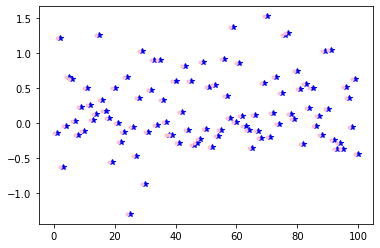

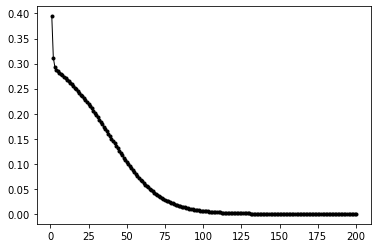

In [10]:
mpl.figure(1)
mpl.plot(range(1,Input_num+1),output.detach().numpy().tolist(),'*',lw=1,color='blue')
mpl.plot(range(0,Input_num),output.detach().numpy().tolist(),'.',lw=1,color='pink')
mpl.show()
mpl.figure(2)
mpl.plot(range(1,step+1),loss_list,'o-',ms=3,lw=1,color='black')
mpl.show()

In [11]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.nn.functional as f
import numpy as np


In [12]:
exapmle_num = 100
hid_num = 10

x = torch.randn(100)
x = Variable(x)
y = Variable(x * 0.3 + 0.4)
y += torch.tensor(np.random.normal(0.1, 0.01, size = y.size()))

In [13]:
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.linear1 = nn.Linear(exapmle_num, hid_num)
        self.linear2 = nn.Linear(hid_num, exapmle_num)
        
    def forward(self, data):
        x = self.linear1(data)
        x = f.relu(x)
        x = self.linear2(x)
        return x

In [14]:
net = net()

learning_rate = 0.1219
optimizer = optim.SGD(net.parameters(), lr = learning_rate)
loss_list = []
step = 300


In [5]:
for ec in range(step):
    optimizer.zero_grad()
    output = net(x)
    loss = nn.MSELoss()(y,output)
    loss_list.append(loss)
    loss.backward()
    optimizer.step()

NameError: name 'step' is not defined

In [86]:
loss_list

[tensor(0.4239, grad_fn=<MeanBackward0>),
 tensor(0.3936, grad_fn=<MeanBackward0>),
 tensor(0.3887, grad_fn=<MeanBackward0>),
 tensor(0.3859, grad_fn=<MeanBackward0>),
 tensor(0.3834, grad_fn=<MeanBackward0>),
 tensor(0.3809, grad_fn=<MeanBackward0>),
 tensor(0.3784, grad_fn=<MeanBackward0>),
 tensor(0.3759, grad_fn=<MeanBackward0>),
 tensor(0.3733, grad_fn=<MeanBackward0>),
 tensor(0.3708, grad_fn=<MeanBackward0>),
 tensor(0.3682, grad_fn=<MeanBackward0>),
 tensor(0.3655, grad_fn=<MeanBackward0>),
 tensor(0.3629, grad_fn=<MeanBackward0>),
 tensor(0.3602, grad_fn=<MeanBackward0>),
 tensor(0.3574, grad_fn=<MeanBackward0>),
 tensor(0.3546, grad_fn=<MeanBackward0>),
 tensor(0.3518, grad_fn=<MeanBackward0>),
 tensor(0.3490, grad_fn=<MeanBackward0>),
 tensor(0.3461, grad_fn=<MeanBackward0>),
 tensor(0.3431, grad_fn=<MeanBackward0>),
 tensor(0.3402, grad_fn=<MeanBackward0>),
 tensor(0.3371, grad_fn=<MeanBackward0>),
 tensor(0.3340, grad_fn=<MeanBackward0>),
 tensor(0.3309, grad_fn=<MeanBackw

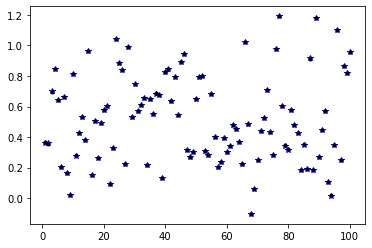

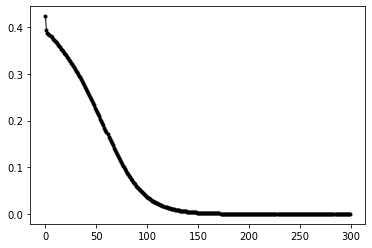

In [88]:
plt.figure(1)
plt.plot(range(1,exapmle_num+1),output.detach().numpy().tolist(),'*',lw=1,color='blue')
plt.plot(range(1,exapmle_num+1),y.detach().numpy().tolist(),'.',lw=1,color='black')
plt.show()
plt.figure(2)
plt.plot(range(0,step),loss_list,'o-',ms=3,lw=1,color='black')
plt.show()